In [1]:
import importlib
import os
import sys
sys.path.append('/home/gpuvmadm/PyTomography/src')
import numpy as np
import pytomography
from misc import get_organ_masks, get_organ_volume, get_photopeak_scatter
import torch
import recon_script
importlib.reload(recon_script)
import sys
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from pytomography.priors import RelativeDifferencePrior, AnatomyNeighbourWeight
from pytomography.io.SPECT import dicom
import pydicom
pytomography.device = device

/tmp/ipykernel_12843/3764002417.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
path = '/disk1/pytomography_paper_results/data'
path_CT = os.path.join(path, 'tc99m_CT')
files_CT = [os.path.join(path_CT, file) for file in os.listdir(path_CT)]
file_NM = os.path.join(path, 'tc99m_projections.dcm')

In [3]:
object_meta, image_meta, photopeak = dicom.get_projections(file_NM, index_peak=0)
_, _, scatter = dicom.get_projections(file_NM, index_peak=1)
attenuation_map = dicom.get_attenuation_map_from_CT_slices(files_CT, file_NM, mode='constant')

Cortical Bone Peak: 1380.0999755859375 HU
Effective CT Energy Determined: 77.73495496565889 keV


/home/gpuvmadm/PyTomography/src/pytomography/io/SPECT/helpers.py:43: RuntimeWarning: overflow encountered in exp
  return c1*np.exp(-d1*np.sqrt(energy)) + c2*np.exp(-d2*np.sqrt(energy))


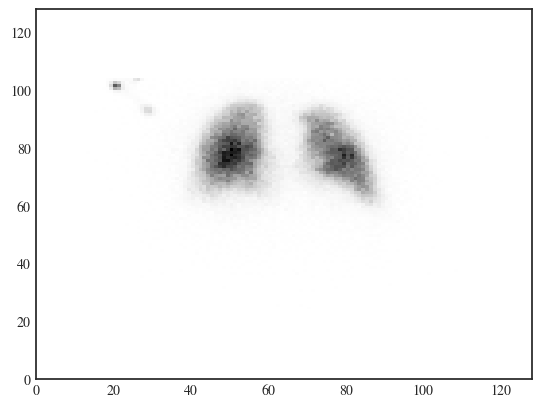

In [4]:
plt.pcolormesh(photopeak[0,0].cpu().T)

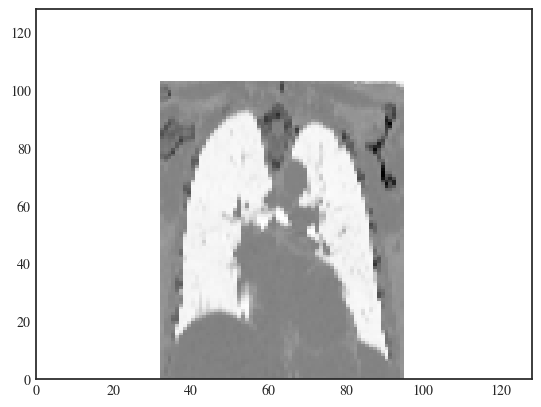

In [5]:
plt.pcolormesh(attenuation_map[0,:,64].cpu().T)